### 1.Preprocessing phase:

In [128]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [67]:
df = pd.read_csv('titanic-passengers.csv',sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df['Cabin'].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
F33                3
D                  3
C22 C26            3
E101               3
F2                 3
B77                2
D35                2
B5                 2
B35                2
C68                2
E33                2
C123               2
F G73              2
C65                2
C78                2
D26                2
C92                2
C126               2
B20                2
E121               2
E44                2
C83                2
B28                2
B51 B53 B55        2
E24                2
D20                2
D36                2
B18                2
C93                2
E8                 2
C124               2
F4                 2
C52                2
C2                 2
D17                2
B22                2
E25                2
B58 B60            2
D33                2
B49                2
B57 B59 B63 B66    2
C125               2
E67                2
C118               1
C7           

In [82]:
df[df["Cabin"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,NaN,S
10,135,No,2,"Sobey, Mr. Samuel James Hayden",male,25.000000,0,0,C.A. 29178,13.0000,NaN,S
11,294,No,3,"Haas, Miss. Aloisia",female,24.000000,0,0,349236,8.8500,NaN,S


In [10]:
#pd.DataFrame(df['Cabin'].value_counts()).plot(kind='bar',figsize=(20,10))

In [83]:
df.loc[df['Cabin'].notnull(),'Cabin'] = 'Cabin_mentioned'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,Cabin_mentioned,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,Cabin_mentioned,S


In [84]:
df['Cabin'] = df['Cabin'].fillna('Cabin_not_mentioned')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Cabin_not_mentioned,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,Cabin_mentioned,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Cabin_not_mentioned,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,Cabin_not_mentioned,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,Cabin_mentioned,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

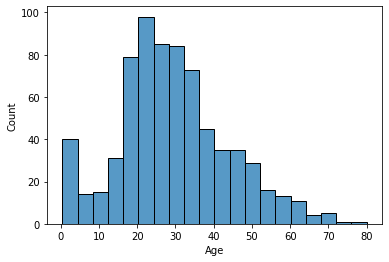

In [13]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

In [79]:
#check average age of males and females 
ageMean = pd.DataFrame({'mean':df.groupby(by="Sex",axis=0)['Age'].mean()})
#df.Age.fillna(int(df.Age.mean()),inplace=True)
ageMean.loc['female','mean']
ageMean

,mean
Sex,
female,27.915709
male,30.726645


In [80]:
#fill missing values of females age with average age of females 
mask = df['Sex'] == 'female' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['female','mean'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [224]:
#fill missing values of males age with average age of males 
mask = df['Sex'] == 'male' 
df.loc[mask,'Age'] = df.loc[mask,'Age'].fillna(ageMean.loc['male','mean'])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
FamilySize     0
dtype: int64

In [226]:
df.dropna(inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

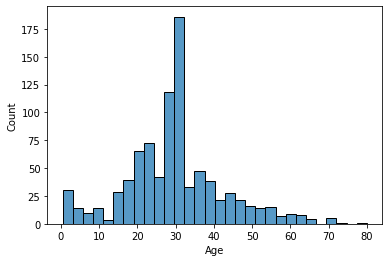

In [86]:
#distirbution of age 
import seaborn as sns
sns.histplot(data=df, x="Age")

<AxesSubplot:xlabel='Sex', ylabel='count'>

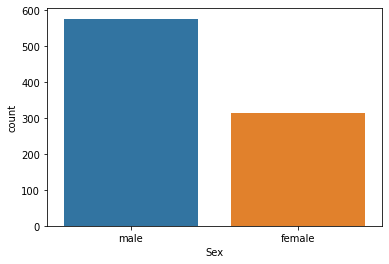

In [94]:
sns.countplot(x="Sex",data=df)

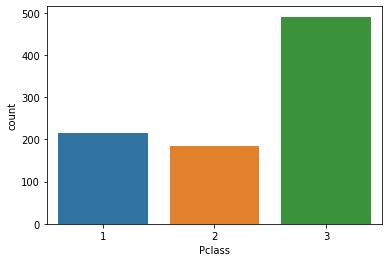

In [98]:
ax = sns.countplot(x="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

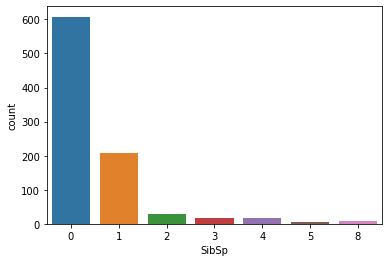

In [160]:
sns.countplot(x="SibSp",data=df)

This graph shows that there are more men than women in the titanic boat. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

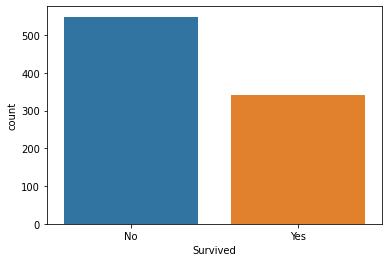

In [92]:
sns.countplot(x="Survived",data=df)

This graph indicates that the number of survivors is about 300 people and that 500 people did not survive. 

In [150]:
df["Sex"].value_counts()
df.loc[(df["Sex"]=="female") & (df["Survived"]=="Yes")]["Survived"].value_counts()
df.loc[(df["Sex"]=="male") & (df["Survived"]=="Yes")]["Survived"].value_counts()

Yes    109
Name: Survived, dtype: int64

#233 femlaes survived over 314==> 74% of females  survived 

#109 males survived over 577 ===> 19% 74% of males survived 

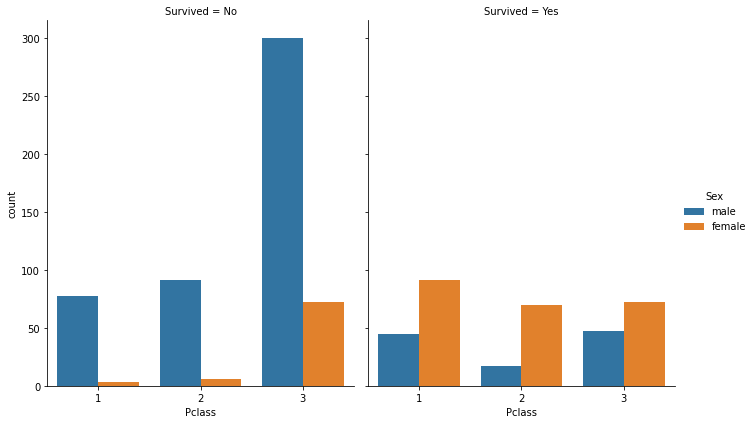

In [105]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=6, aspect=.8);

This graph shows the number of survivors by gender, looking at the number of men and women, we noticed that the number of men is higher than the number of women, but the number of women survivors is higher than the number of men. Women had a much better chance of survival, which may be due to the fact that they boarded the lifeboats first, regardless of their class, unlike men. out of 311 women on board, 339 survived. out of 843 men on board, only 161 survived.

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


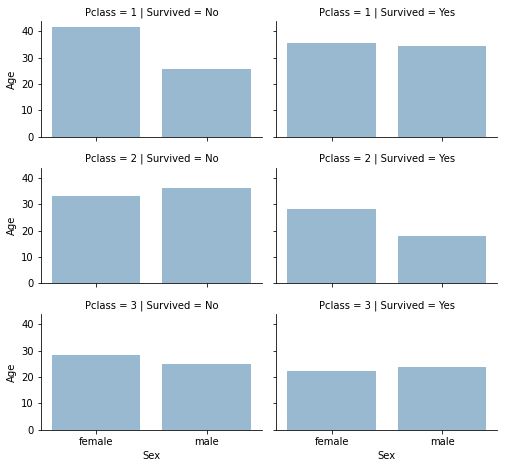

In [106]:
#check correlation between survived and pclass and sex 
grid = sns.FacetGrid(df, row='Pclass',col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

Analyzing this graph, we can consider the following remarks:

    **The first and second class have more chances of survival. 
    ** People between 1 and 30 years old have more chances of survival. 
    ** Women have a higher chance of survival than men. 


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


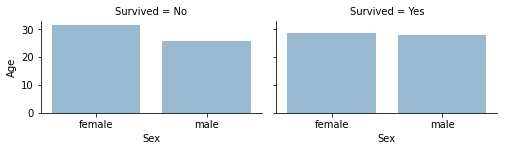

In [156]:
#correlation between age sex 
grid = sns.FacetGrid(df,col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot  ,"Sex","Age", alpha=.5, ci=None)
grid.add_legend()

** males or females under 30 years old have better chance to survive

** females have better chance to survive

In [157]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

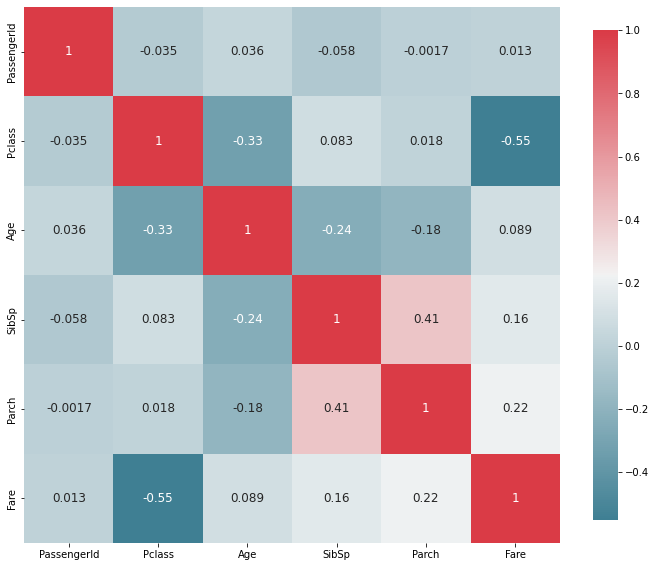

In [159]:
plot_correlation_map( df )

a heatmap denotes how changes between two variables relate. Two variables that change in the same direction are positively correlated. A change in opposite directions implies negative correlation. as we can see the correlation between titanic inputs have a low correlation the highest positive correlation in the inputs are between SibSp and Fare ;; and the highest negative correlation is between fare and pclass (each time the class number decreases the fare increases )

In [162]:
#use the groupby function combined with the mean() to view the relation between Pclass and survived 
df.groupby(by=["Survived","Pclass"]).mean()

PassengerId        Age     SibSp     Parch       Fare
Survived Pclass                                                       
No       1        410.300000  41.101579  0.287500  0.300000  64.684007
         2        452.123711  33.341098  0.319588  0.144330  19.412328
         3        453.580645  27.570785  0.672043  0.384409  13.669364
Yes      1        491.772059  34.704372  0.492647  0.389706  95.608029
         2        439.080460  26.058790  0.494253  0.643678  22.055700
         3        394.058824  22.935735  0.436975  0.420168  13.694887

In [185]:
df['Title'] = df['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,Cabin_not_mentioned,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,Cabin_mentioned,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,Cabin_not_mentioned,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,Cabin_not_mentioned,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,Cabin_mentioned,S,Mr


In [186]:
df.drop('Name', inplace=True, axis=1)

In [187]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,Cabin_not_mentioned,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,Cabin_mentioned,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,Cabin_not_mentioned,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,Cabin_not_mentioned,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,Cabin_mentioned,S,Mr


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


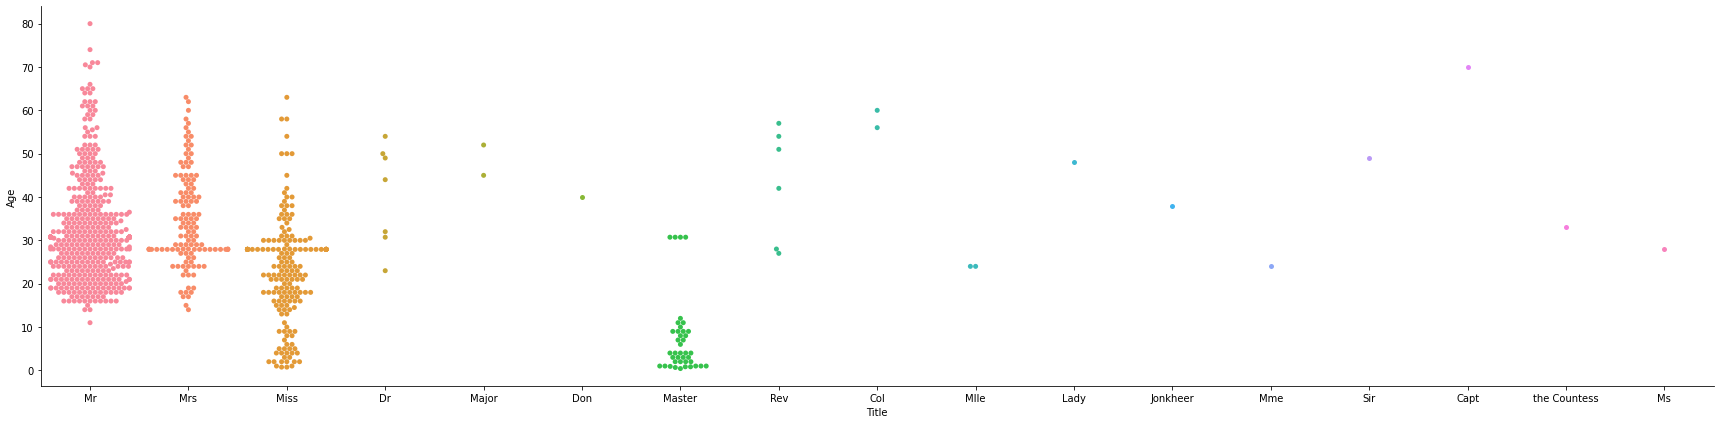

In [197]:
#coorelation between age and title
sns.catplot(x="Title", y="Age", kind="swarm", data=df,size=6,aspect=4,)


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


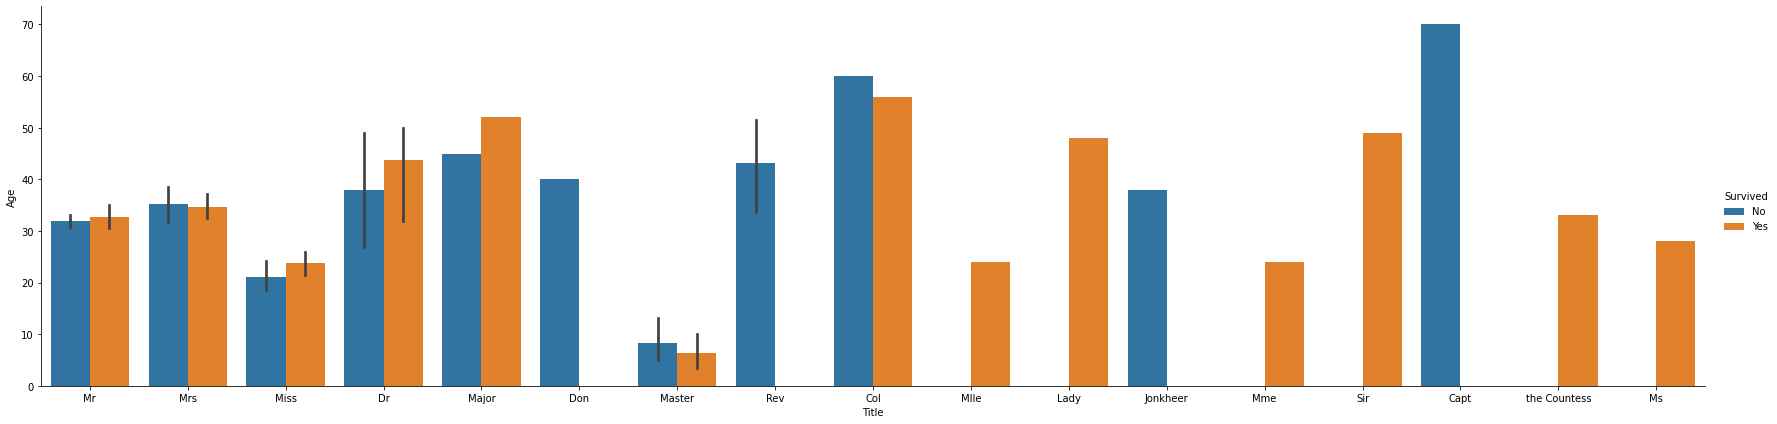

In [203]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=4)

In [207]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [210]:
df['Title'].replace(Title_Dictionary,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,Cabin_not_mentioned,S,Mrs
1,76,No,3,male,25.0,0,0,348123,7.6500,Cabin_mentioned,S,Mrs
2,641,No,3,male,20.0,0,0,350050,7.8542,Cabin_not_mentioned,S,Mrs
3,568,No,3,female,29.0,0,4,349909,21.0750,Cabin_not_mentioned,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,Cabin_mentioned,S,Mrs


c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


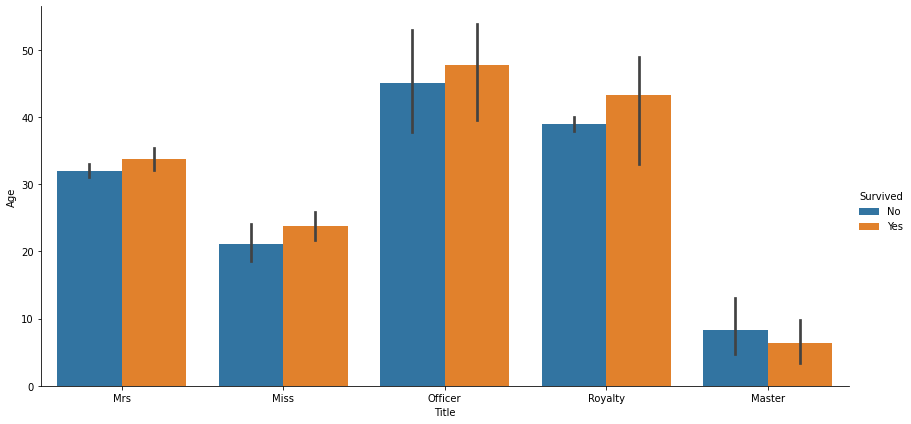

In [213]:
sns.catplot(x="Title", y="Age", hue="Survived", kind="bar", data=df,size=6,aspect=2)

In [216]:
 #Finally, use the Parch and the SibSp columns to create a more useful feature, let's call it FamilySize.
df['FamilySize'] = df["SibSp"] + df["Parch"]


In [217]:
#drop the columns 
df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)

c:\users\dell 5400\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


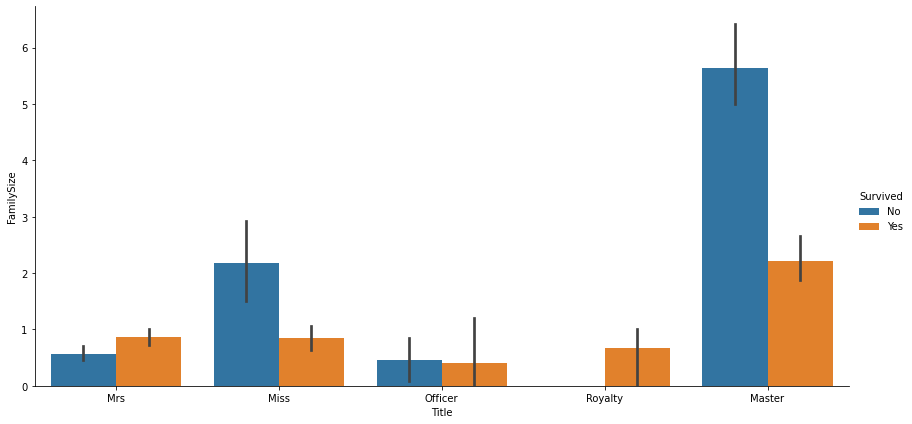

In [223]:
sns.catplot(x="Title", y="FamilySize", hue="Survived", kind="bar", data=df,size=6,aspect=2)

this feature  is important cuz it shows that there is a correlation between Family size and survivals and their title.. as we can see in this graph   Masters have the highest number of familysize and they are more likely to not survive, and all the royality class who has family survived and those who has the title miss and have more than 2 memebrs of family are  more likely to not survive.   